<a href="https://colab.research.google.com/github/kunal24bit/Outlier-detection-and-its-treatment/blob/main/Outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is an outlier?**

An outlier is a datapoint in a data set that distant from all other observations.

**How to find outlier in a dataset?**

There are so many ways to find the outlier in the given dataset:

1. Using Boxplot
2. Using Z -Score
3. Using IQR(Inter quartile range)
4. Using scatter plots

**Criteria to detect outlier**

1. if using box plot then the data point which falls below the (Q1-1.5*IQR) or the data point which falls above the (Q3+1.5*IQR) are outliers.

2. 

In [44]:
import numpy as np

import pandas as pd

In [45]:
df  = pd.read_csv("Outliers.csv")

In [46]:
df

,Height M,Z-score
0,1.589492,-0.346033
1,1.650782,-0.319753
2,1.713147,-0.293012
3,1.713566,-0.292832
4,1.721237,-0.289543
5,1.729618,-0.285949
6,1.734295,-0.283944
7,1.766343,-0.270202
8,1.801769,-0.255012
9,1.839402,-0.238875


In [47]:
import matplotlib.pyplot as plt

In [48]:
print(df["Height M"].mean())

print(df["Height M"].std())

2.3965177826666673
2.33216940956709


**Detecting the outlier using Boxplot**

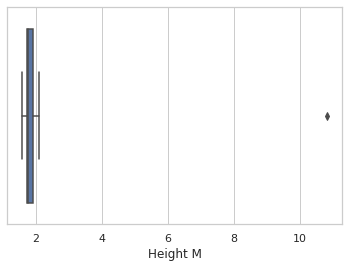

In [49]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Height M"])

In [50]:
Q1 = np.percentile(df["Height M"], 25)

Q3 = np.percentile(df["Height M"], 75)

IQR = Q3-Q1


**Impact of the outlier**

1. Problematic for statistical analysis
 

**Removing Outlier**

In [51]:
df.drop(df.index[df['Height M']> (Q3+1.5*IQR)], inplace = True)

In [52]:
df

,Height M,Z-score
0,1.589492,-0.346033
1,1.650782,-0.319753
2,1.713147,-0.293012
3,1.713566,-0.292832
4,1.721237,-0.289543
5,1.729618,-0.285949
6,1.734295,-0.283944
7,1.766343,-0.270202
8,1.801769,-0.255012
9,1.839402,-0.238875


In [53]:
print(df["Height M"].mean())

print(df["Height M"].std())

1.7953026242857144
0.13577928039796566


A single value changes the mean height by 0.6m (2 feet) and the standard deviation by a whopping 2.16m (7 feet).